In [1]:
%matplotlib inline
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

from mixcoatl.sourcegrid import DistortedGrid

In [6]:
grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6864D_dither/results/MC_C_20191030_000410_R22_S11_15.0s_-2.0x_-3.9y_distorted_grid.fits')
corrected_grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/test/MC_C_20191030_000410_R22_S11_15.0s_-2.0x_-3.9y_corrected_distorted_grid.fits')
optic_grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/test/optical_distortion_grid.fits')


In [7]:
print(grid['X'])
print(optic_grid['DX'])
print(corrected_grid['X'])

[ 772.83613415  776.39054091  779.94494768 ... 4067.9758033  4071.53021006
 4075.08461682]
[-0.77466479 -0.54038337 -0.72167299 ... -2.01550754 -2.05161574
 -2.11650484]
[ 772.06134764  775.85006452  779.22318231 ... 4065.96016488 4069.4784547
 4072.96795918]


## Original

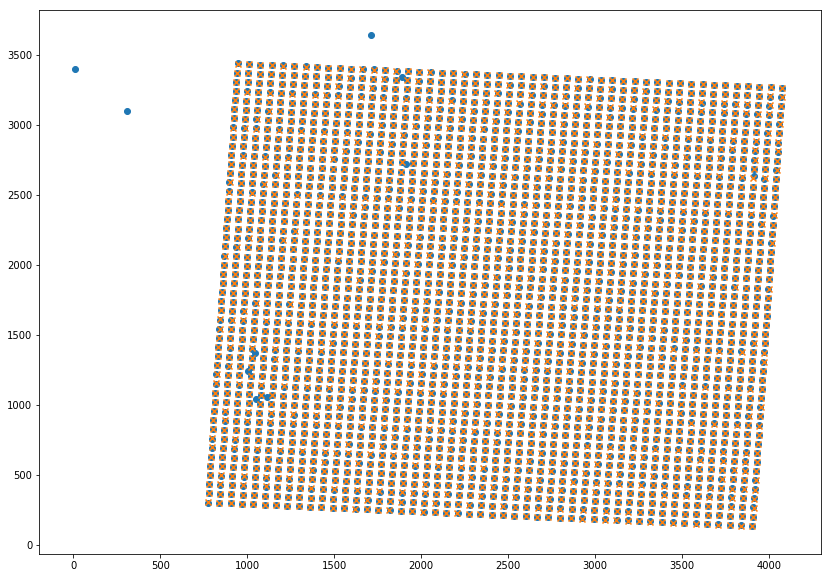

In [8]:
src = fits.getdata('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6864D_dither/catalogs/MC_C_20191030_000410_R22_S11_15.0s_-2.0x_-3.9y.cat')
grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6864D_dither/results/MC_C_20191030_000410_R22_S11_15.0s_-2.0x_-3.9y_distorted_grid.fits')

srcX = src['base_SdssShape_x']
srcY = src['base_SdssShape_y']

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.scatter(srcX, srcY, marker='o')
ax.scatter(grid['X'], grid['Y'], marker='x')

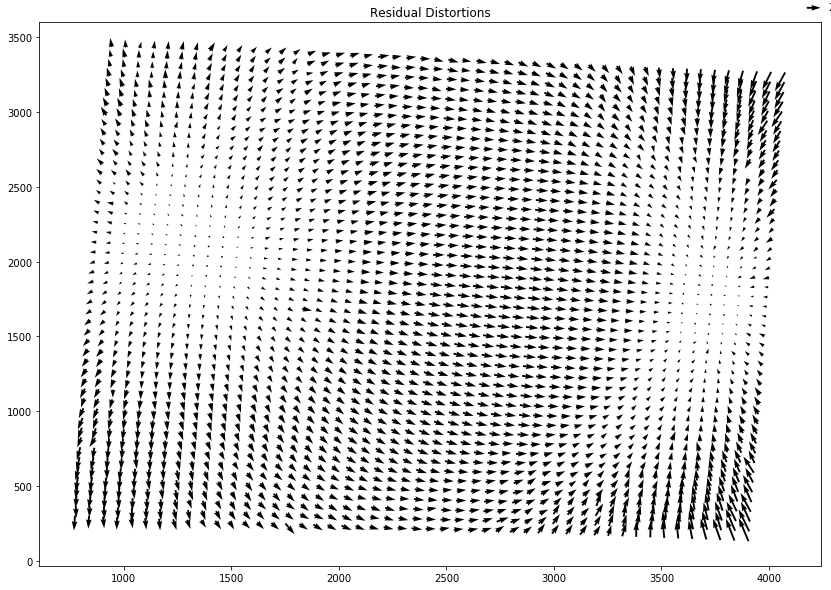

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_title('Residual Distortions')
Q = ax.quiver(grid['X'], grid['Y'], grid['DX'], grid['DY'])
qk =ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

## Corrected

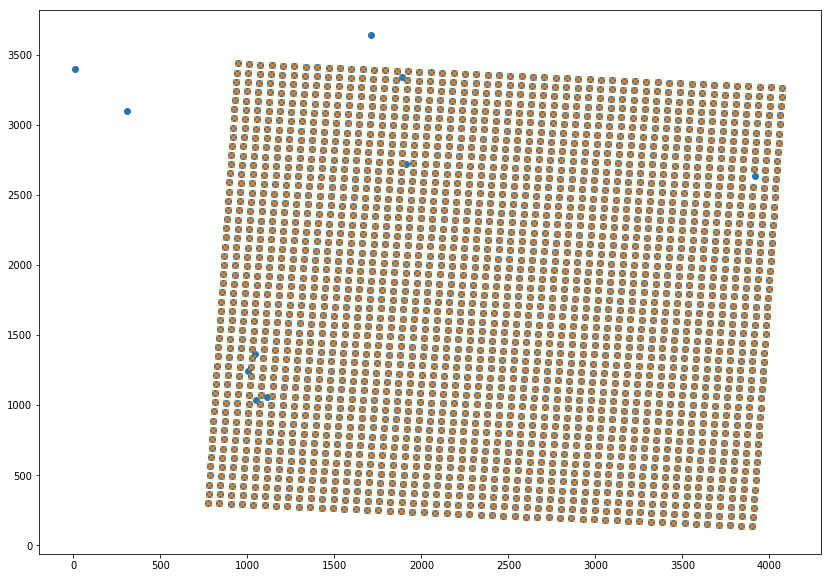

In [10]:
corrected_grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/test/MC_C_20191030_000410_R22_S11_15.0s_-2.0x_-3.9y_corrected_distorted_grid.fits')

gridY, gridX = corrected_grid.get_source_coordinates(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.scatter(srcX, srcY, marker='o')
ax.scatter(gridX, gridY, marker='x')

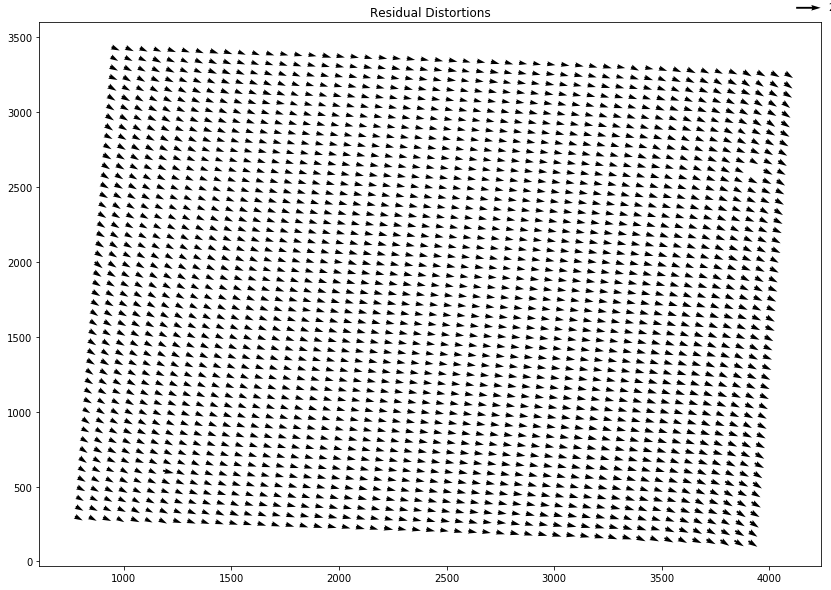

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_title('Residual Distortions')
Q = ax.quiver(corrected_grid['X'], corrected_grid['Y'], corrected_grid['DX'], corrected_grid['DY'])
qk =ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

## Optics

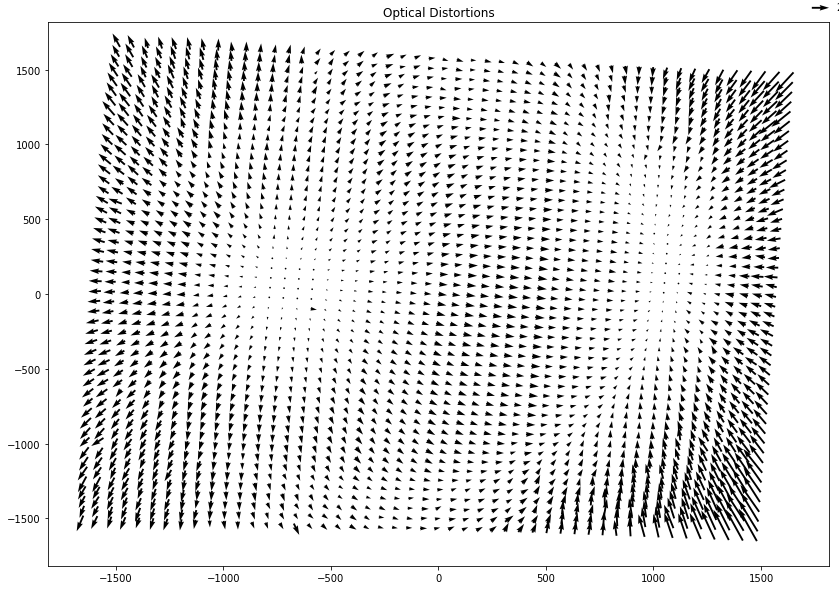

In [15]:
optic_grid = DistortedGrid.from_fits('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/test/optical_distortion_grid.fits')

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_title('Optical Distortions')
Q = ax.quiver(optic_grid['X'], optic_grid['Y'], optic_grid['DX'], optic_grid['DY'])
qk =ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')